In [134]:
import numpy as np
import pandas as pd
import kagglehub
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("/content/drive/MyDrive/flood.csv")

In [48]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [49]:
# df.describe()
df.info()
df.isnull().sum() # checking for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [50]:
# for i in df.columns.values:
#   print(i, df[i].unique())

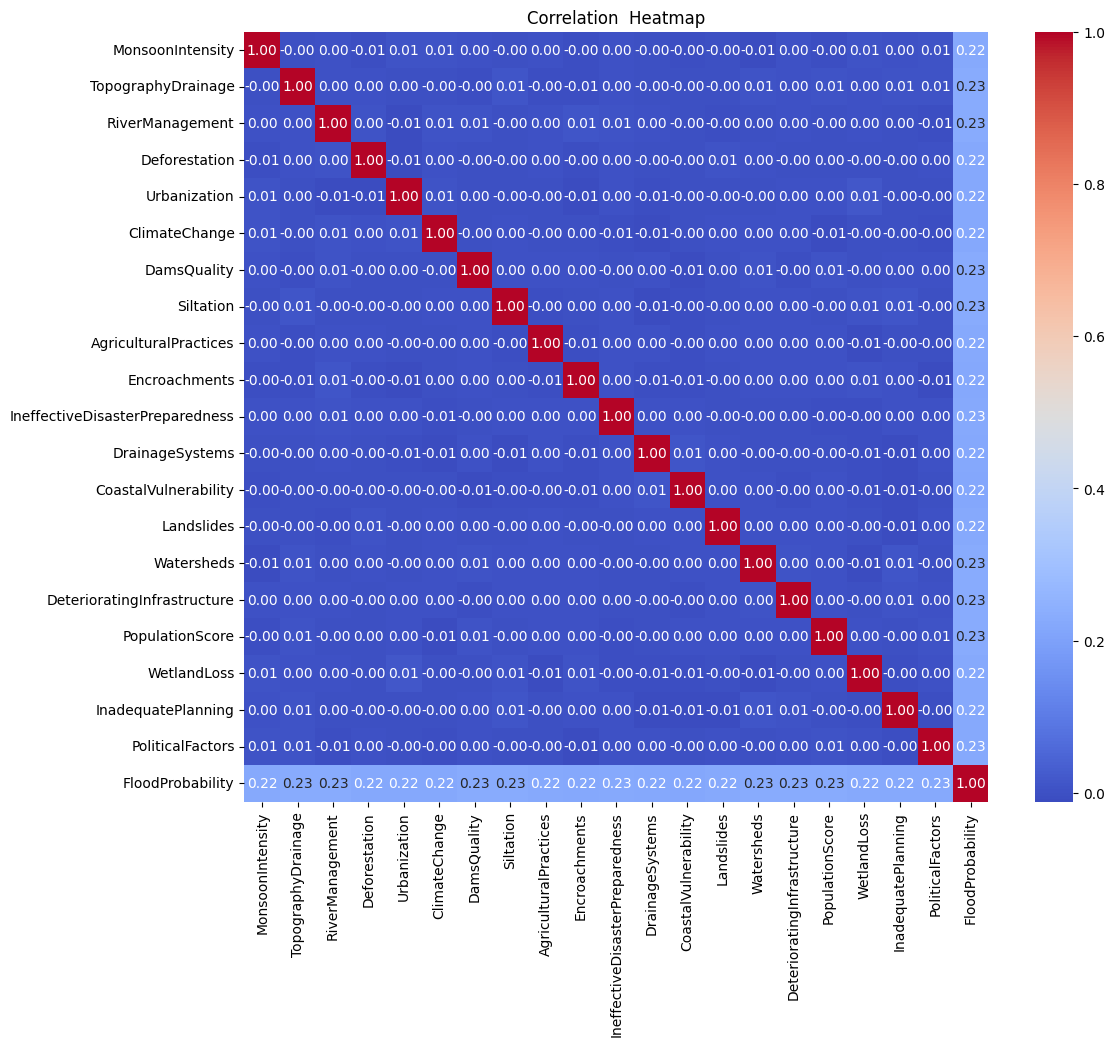

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation  Heatmap")
plt.show()

#result shows no correlation

In [52]:
# listing all comuns name of dataframe
all_columns = df.columns
all_columns, len(all_columns)

(Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
        'Siltation', 'AgriculturalPractices', 'Encroachments',
        'IneffectiveDisasterPreparedness', 'DrainageSystems',
        'CoastalVulnerability', 'Landslides', 'Watersheds',
        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
        'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
       dtype='object'),
 21)

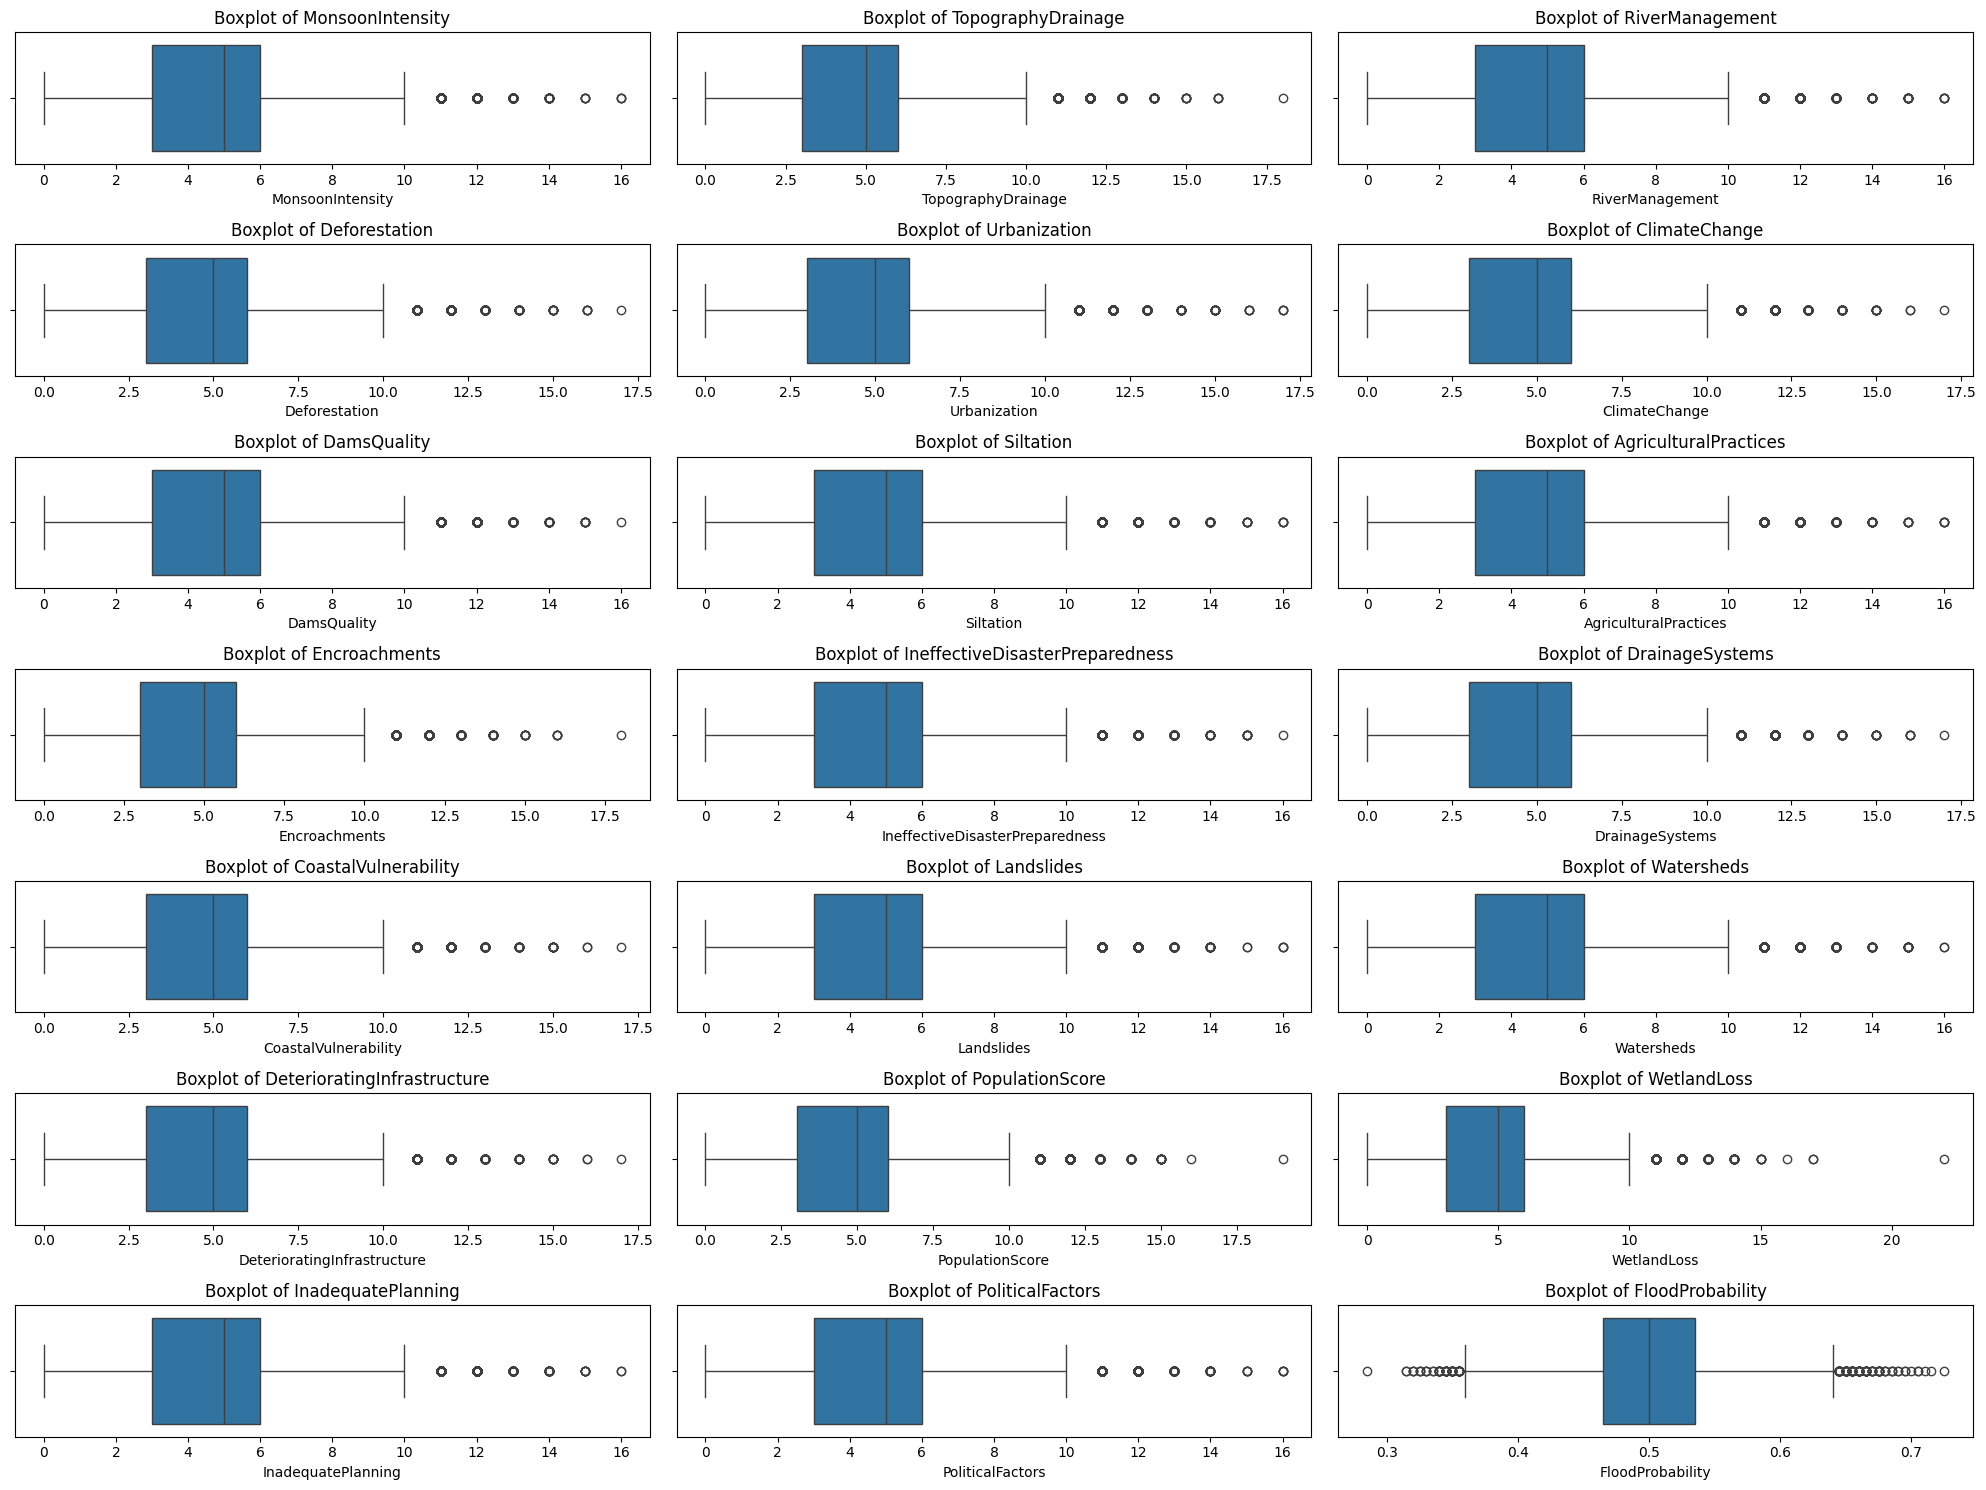

In [53]:
columns = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'
]

# Create a 3x6 grid of subplots (adjusting layout for 17 columns)
fig, axes = plt.subplots(7, 3, figsize=(20, 15))  # 6 rows, 3 columns grid

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate over columns and corresponding axes
for i, column in enumerate(columns):
    sns.boxplot(ax=axes[i], data=df, x=column)  # Pass the `ax` to sns.boxplot
    axes[i].set_title(f"Boxplot of {column}")

# Hide any unused subplots if the number of columns doesn't fill the grid
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing to prevent overlap
plt.tight_layout()
plt.show()

# Determining X and y

In [54]:
# X and y dataset as 2-D arrays
X = df.loc[:, all_columns.drop('FloodProbability')].values
y  = df.loc[:, 'FloodProbability'].values

In [55]:
# converting y into 2-D

y = y.reshape(-1, 1)

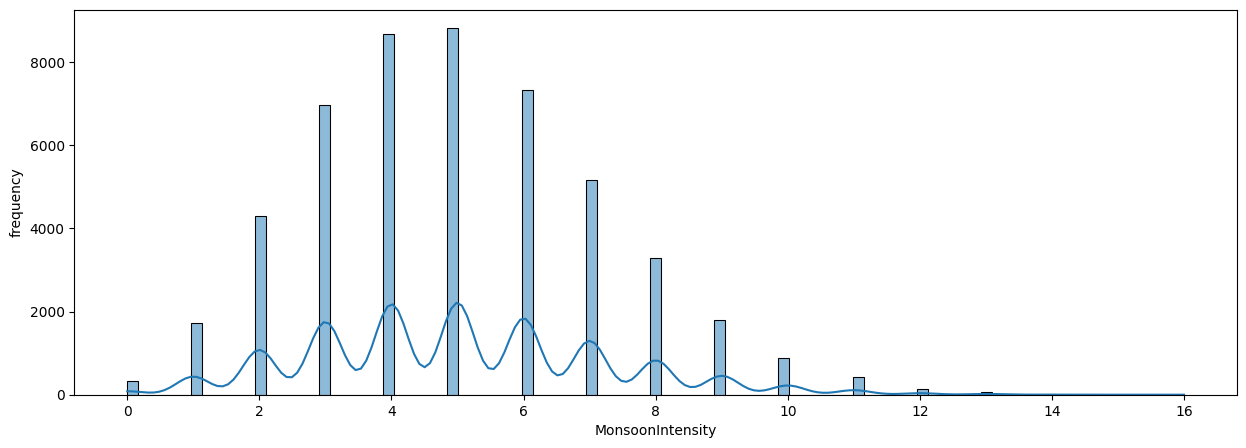

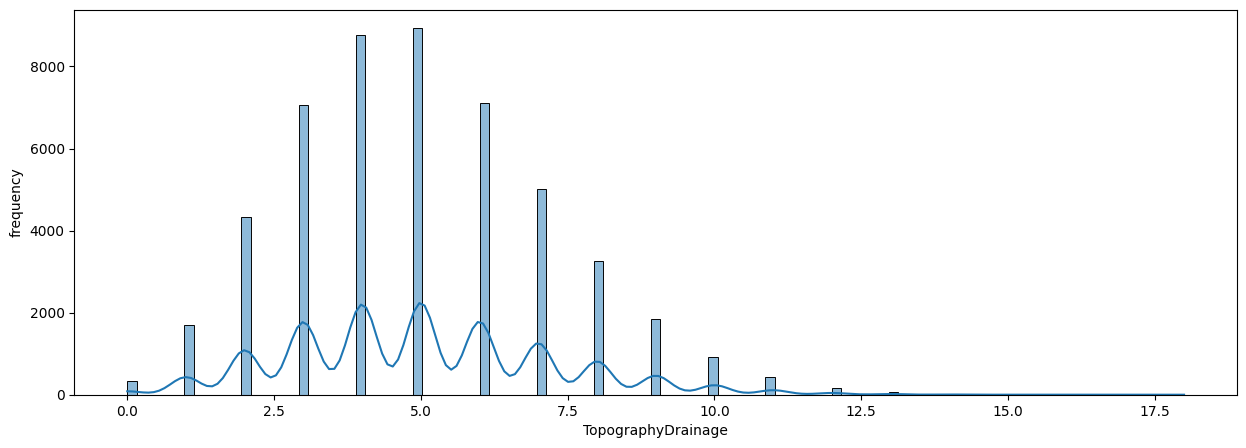

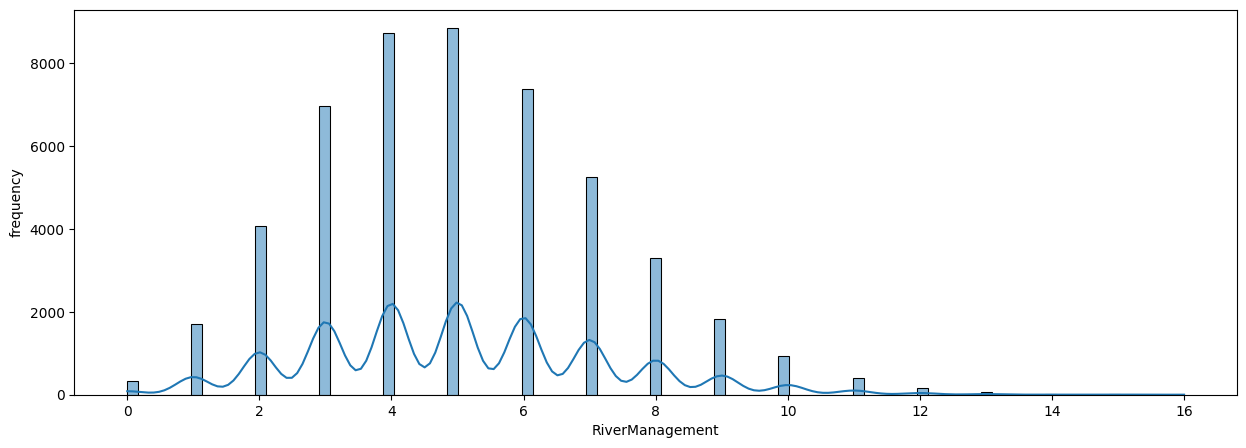

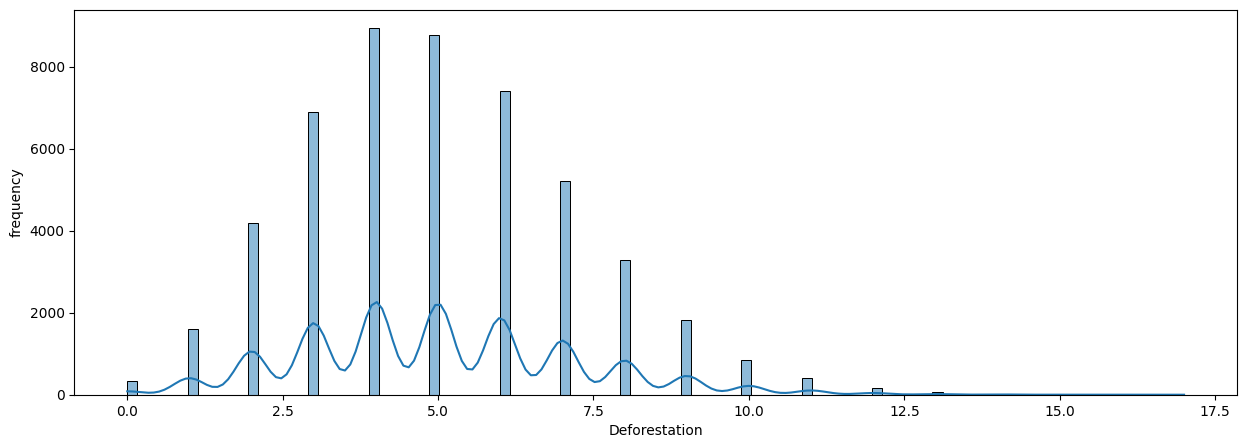

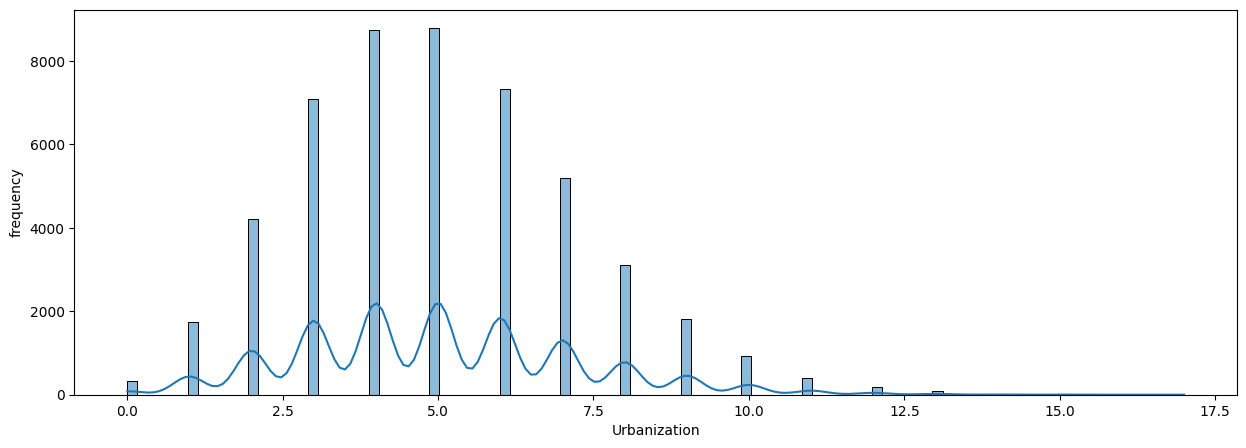

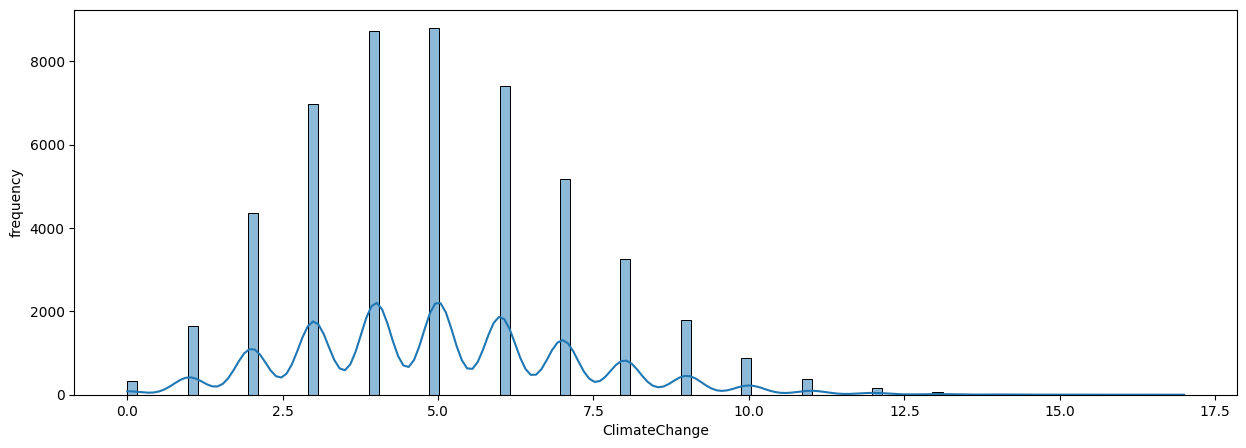

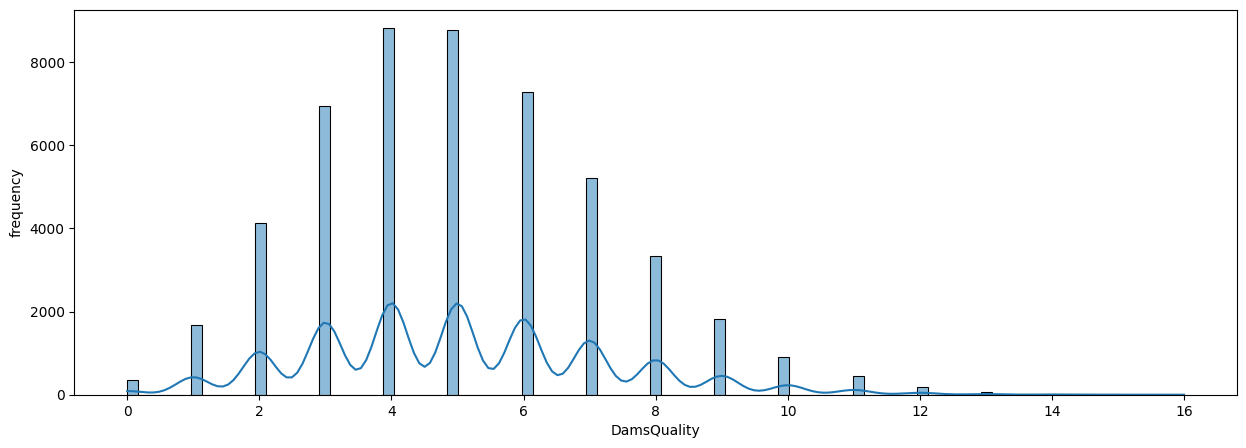

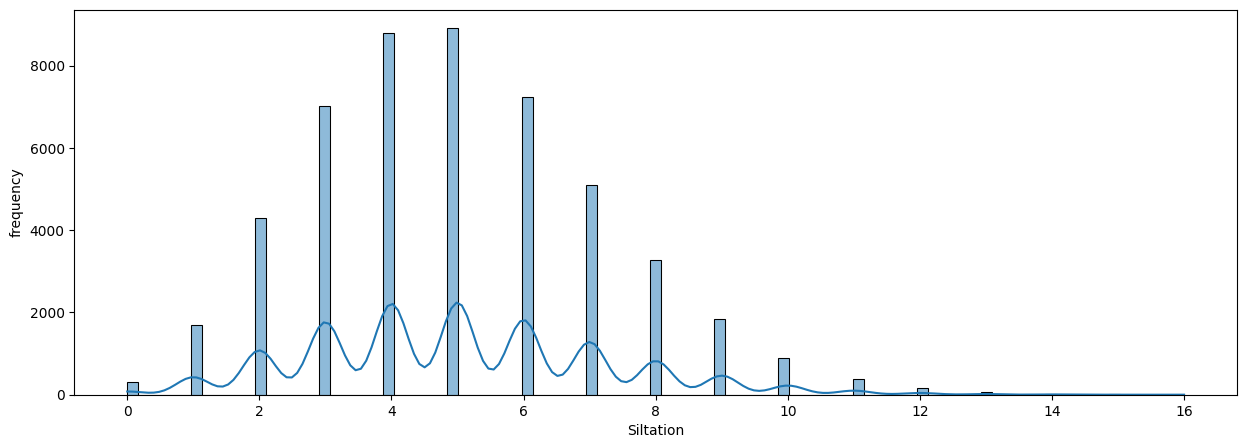

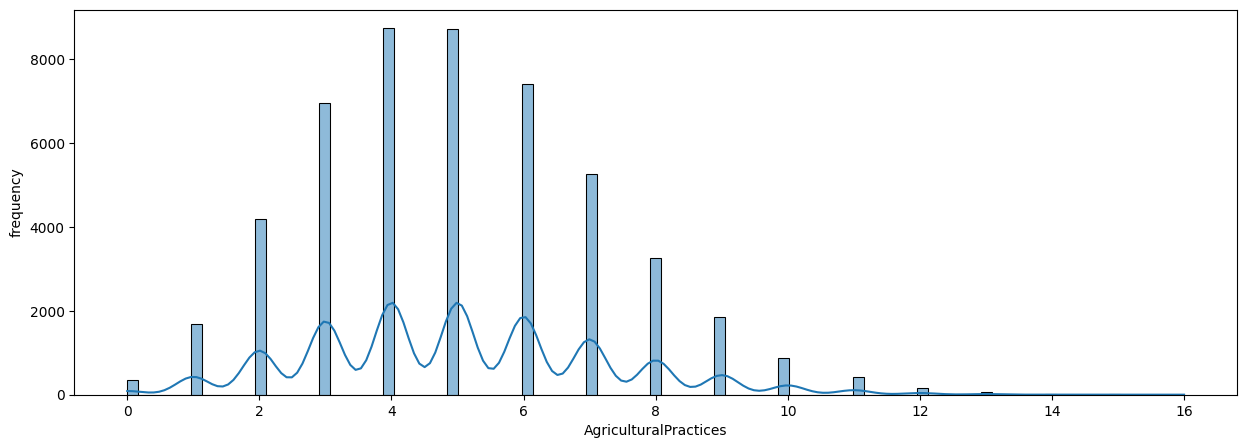

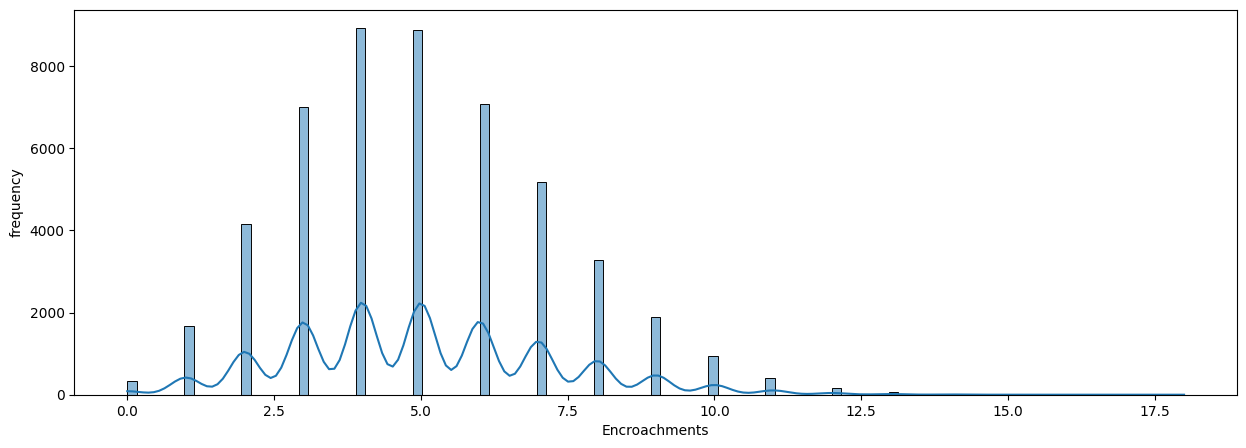

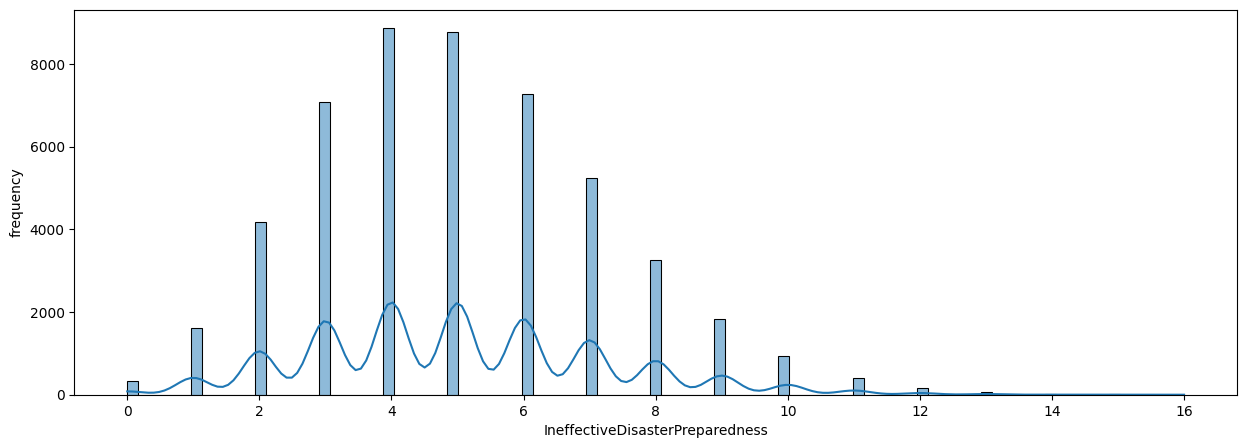

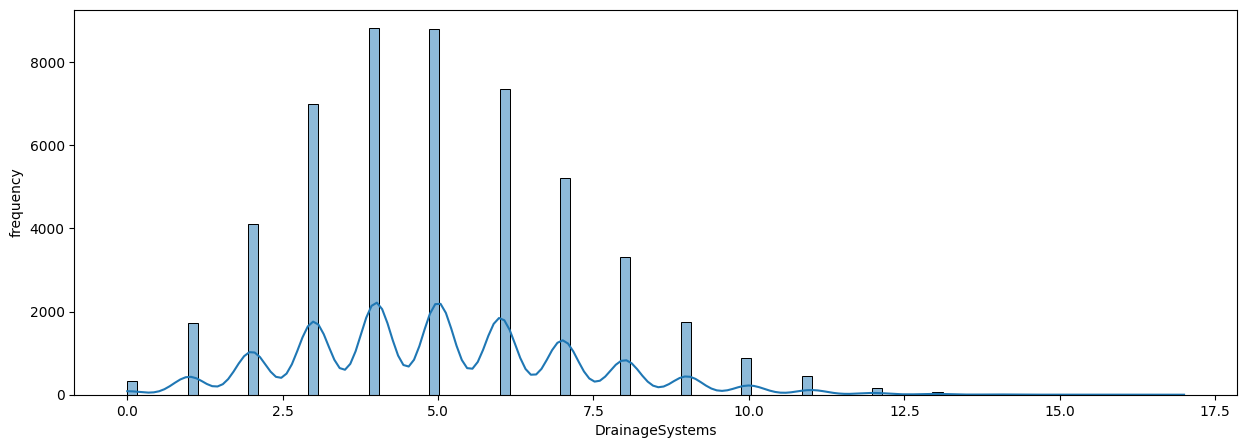

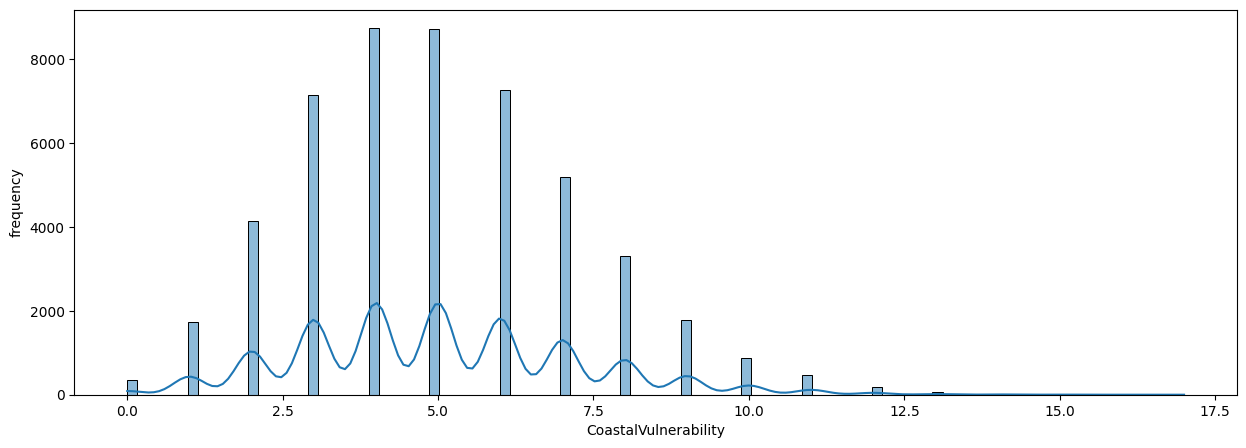

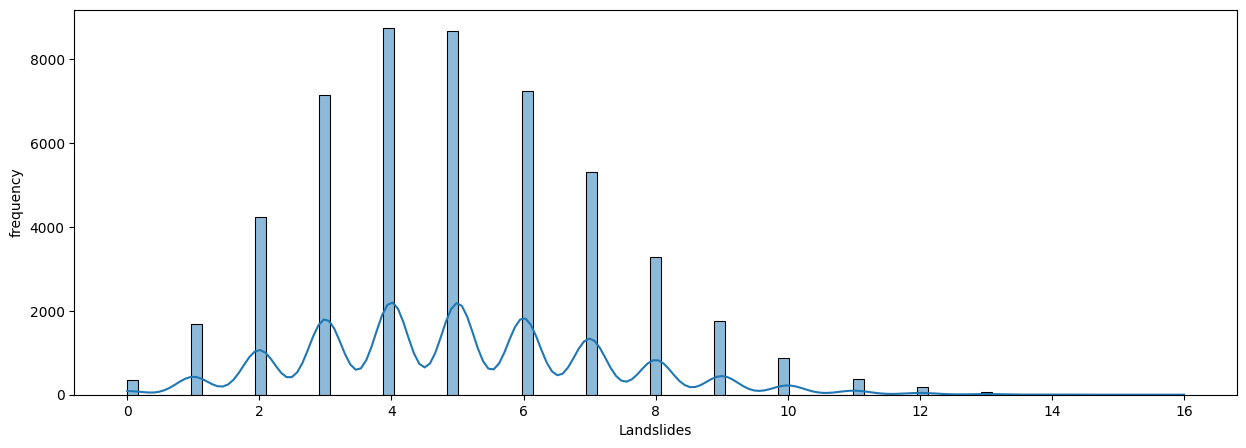

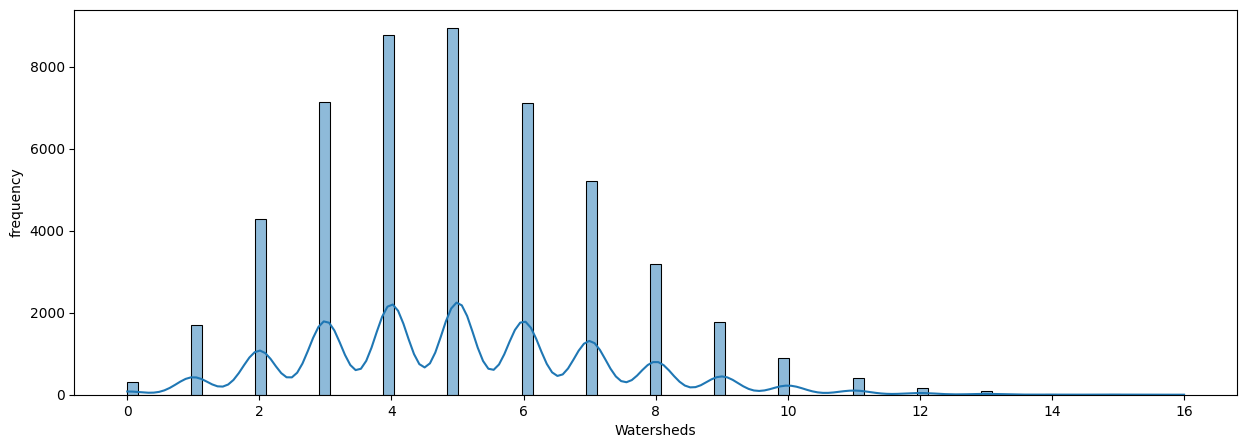

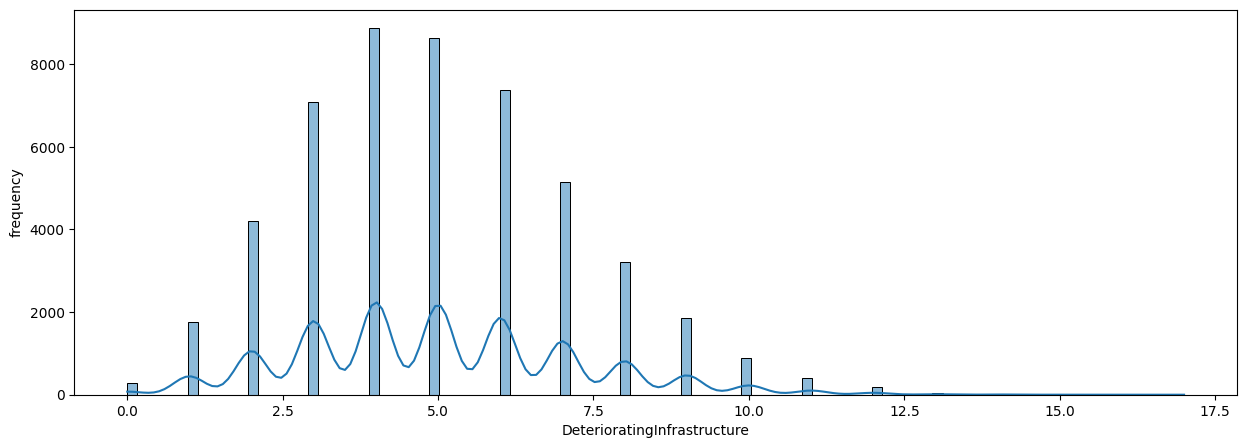

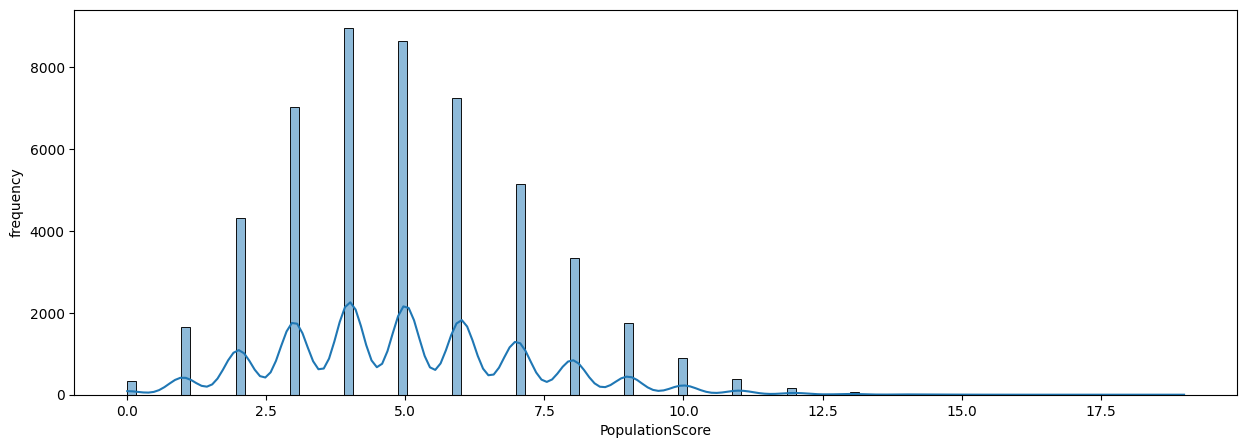

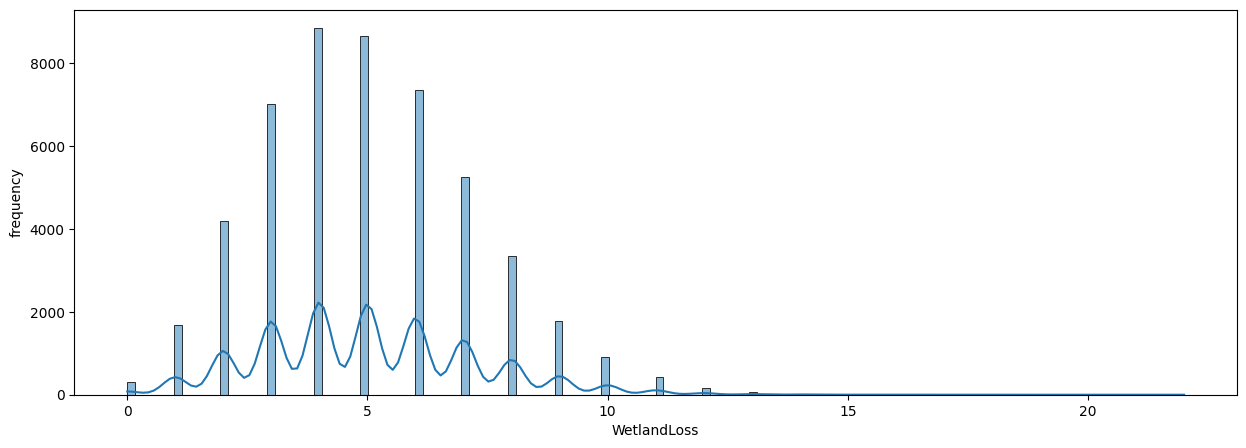

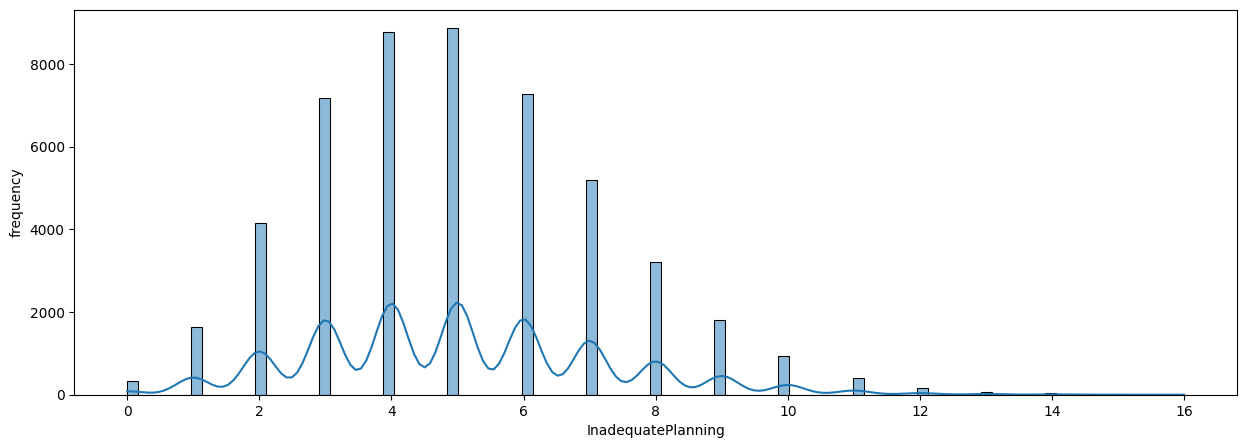

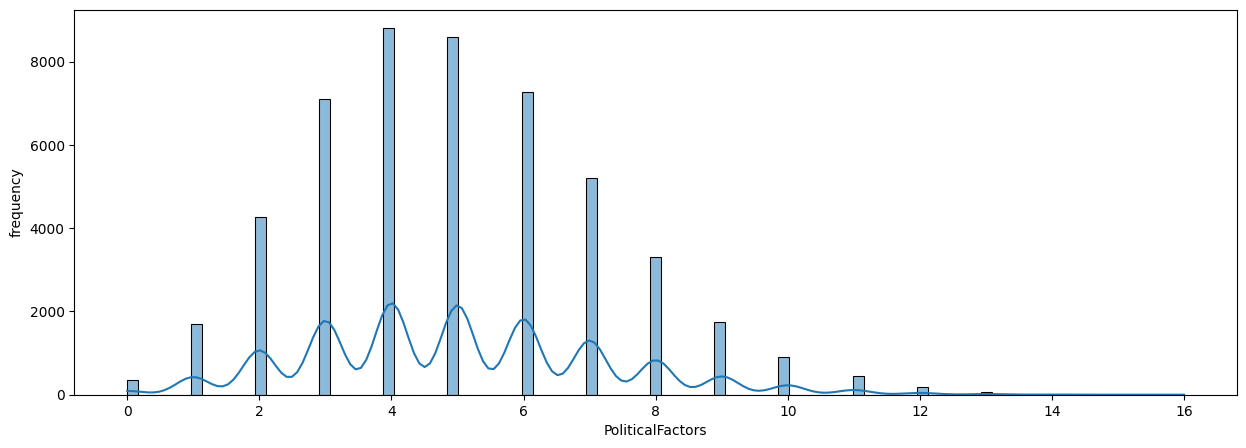

In [56]:
# histogram visualization
for i in range(len(df.drop(['FloodProbability'], axis = 1).columns.values)):
  plt.figure(figsize=(15, 5))
  sns.histplot(X[:, i], kde = True)
  plt.xlabel(df.columns.values[i])
  plt.ylabel('frequency')
  plt.show()

In [57]:
#Normalizing the given data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

# Split dataset into training and testing

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the model

In [59]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators= 100, random_state = 0)



## Hyperparameter tuning

In [60]:
# Initilize the ranges of Hyperparameters

param_grid_rfr = {
    # "n_estimators": [50, 100, 200]
    # "max_features": ["sqrt", "log2"],
    "max_depth" : [None, 10, 20]
    # "min_samples_split": [2, 5, 10],
    # "min_samples_leaf": [1, 2, 4]
}

In [61]:
# hyperparameter tuning


grid_search_rfr = GridSearchCV(estimator = regressor, param_grid = param_grid_rfr, cv = 5,
                              n_jobs =-1, verbose = 2)

bestmodelRFR = grid_search_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [62]:
best_rfr_model = grid_search_rfr.best_estimator_

print(best_rfr_model)
print("best parameters for random forest:", grid_search_rfr.best_params_)

RandomForestRegressor(random_state=0)
best parameters for random forest: {'max_depth': None}


In [135]:
cv_scores_rfr  = cross_val_score(best_rfr_model, X_train, y_train.reshape(-1), cv = 5)
print("Cross Validation scores:", cv_scores_rfr)
print("mean")

Cross Validation scores: [0.72914061 0.72389001 0.7245934  0.72231717 0.72988232]
mean


In [136]:
y_pred_rfr = best_rfr_model.predict(X_test)

print("test_accuracy_score:", mean_squared_error(y_test, y_pred_rfr))
print("test set confusion matrix:\n", r2_score(y_test, y_pred_rfr))

test_accuracy_score: 0.0006762376695000005
test set confusion matrix:
 0.7303289990740296


In [139]:
OptimumRegressor_rfr = RandomForestRegressor(n_estimators= 100, max_depth = None, random_state = 0)
OptimumRegressor_rfr.fit(X_train, y_train.reshape(-1))

RandomForestRegressor(random_state=0)

## Plotting the acccuracy vs trainsize curve for assessing the performance of the model

In [140]:
train_sizes, train_scores, test_scores = learning_curve(OptimumRegressor_rfr, X_train, y_train.reshape(-1), cv = 5, scoring='neg_mean_squared_error', verbose = 2)

[learning_curve] Training set sizes: [ 3200 10400 17600 24800 32000]
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=  17.6s
[CV] END .................................................... total time=  25.8s
[CV] END .................................................... total time=  32.7s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=  19.3s
[CV] END .................................................... total time=  26.1s
[CV] END .................................................... total time=  32.6s
[CV] END .................................................... total time=   3.0s
[CV] END ...............................

In [141]:
train_mean =np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean =np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

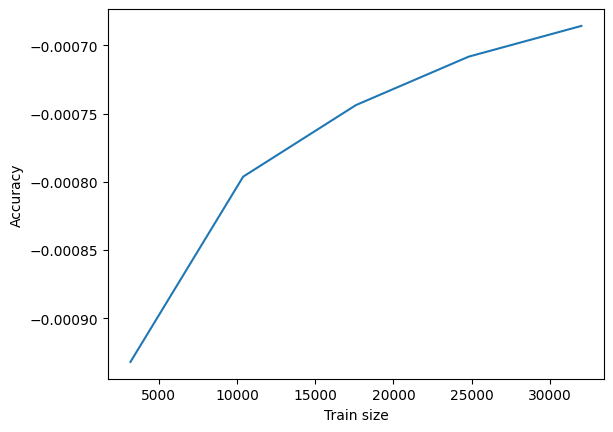

In [142]:
# plt.plot(train_sizes, train_mean, label = "Training Error")
plt.plot(train_sizes, test_mean, label = "Cross-validation Error rfr")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.show()

## Save random forest regressor model in pickle

In [143]:
# save model and feature names to  a pickle file

model_data_rfr = {"model_rfr": best_rfr_model, "feature_names": df.columns.values.tolist()}

with open("flood_prediction_RandomForestRegressor.pk1", "wb") as file:
  pickle.dump(model_data_rfr, file)

### Load the saved random forest regressor model from pickle file and use it for prediction

In [144]:
import pickle
import pandas as pd

In [145]:
with open("flood_prediction_RandomForestRegressor.pk1", "rb") as file:
  model_data_rfr = pickle.load(file)

In [146]:
model_rfr = model_data_rfr["model_rfr"]
feature_names_rfr =  model_data_rfr["feature_names"]

In [147]:
prediction_rfr = best_rfr_model.predict(X_test)
print("test_accuracy_score:", r2_score(y_test, prediction_rfr))
print("test set confusion matrix:\n", mean_squared_error(y_test, prediction_rfr))

test_accuracy_score: 0.7303289990740296
test set confusion matrix:
 0.0006762376695000005


# Neural Network Model for flood data

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Input
from tensorflow.keras.activations import linear, relu, sigmoid

In [94]:
tf.random.set_seed(1234)  # applied to achieve consistent results

def create_model_nn(optimizer='adam'):
  regressor_nn = Sequential()
  regressor_nn.add(Input(shape=(X_train.shape[1],)))
  regressor_nn.add(Dense(64, activation='relu', name = 'layer1'))
  regressor_nn.add(Dense(32, activation='relu', name = 'layer2'))
  regressor_nn.add(Dense(1, activation='relu', name = 'Outputlayer'))


  regressor_nn.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = optimizer,
    metrics = ['MeanSquaredError']
  )

  return regressor_nn

## Fitting the neural network model

In [95]:
# Initilize the ranges of Hyperparameters

param_grid_nn = {
    'optimizer': ['rmsprop', 'adam']
}

In [96]:
# !pip install scikeras
from scikeras.wrappers import KerasRegressor

regressor_nn = KerasRegressor(model = create_model_nn, epochs=10, verbose=2)

In [99]:
grid_nn = GridSearchCV(estimator = regressor_nn, param_grid = param_grid_nn, cv=3)

In [100]:
try:
    grid_result_nn = grid_nn.fit(X_train, y_train)
except Exception as e:
    print(f"Error: {e}")

Epoch 1/10
834/834 - 3s - 3ms/step - MeanSquaredError: 0.0095 - loss: 0.0095
Epoch 2/10
834/834 - 2s - 3ms/step - MeanSquaredError: 3.7007e-04 - loss: 3.7007e-04
Epoch 3/10
834/834 - 4s - 4ms/step - MeanSquaredError: 1.3263e-04 - loss: 1.3263e-04
Epoch 4/10
834/834 - 5s - 6ms/step - MeanSquaredError: 7.4085e-05 - loss: 7.4085e-05
Epoch 5/10
834/834 - 4s - 5ms/step - MeanSquaredError: 4.9033e-05 - loss: 4.9033e-05
Epoch 6/10
834/834 - 2s - 3ms/step - MeanSquaredError: 2.7947e-05 - loss: 2.7947e-05
Epoch 7/10
834/834 - 2s - 3ms/step - MeanSquaredError: 2.5687e-05 - loss: 2.5687e-05
Epoch 8/10
834/834 - 4s - 4ms/step - MeanSquaredError: 1.3496e-05 - loss: 1.3496e-05
Epoch 9/10
834/834 - 3s - 4ms/step - MeanSquaredError: 3.3505e-05 - loss: 3.3505e-05
Epoch 10/10
834/834 - 1s - 2ms/step - MeanSquaredError: 1.9140e-05 - loss: 1.9140e-05
417/417 - 1s - 1ms/step
Epoch 1/10
834/834 - 2s - 3ms/step - MeanSquaredError: 0.0095 - loss: 0.0095
Epoch 2/10
834/834 - 1s - 1ms/step - MeanSquaredError: 5

In [101]:
best_model_nn = grid_nn.best_estimator_

print(best_model_nn)
print("best parameters for random forest:", grid_nn.best_params_)

KerasRegressor(
	model=<function create_model_nn at 0x7c71833d27a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)
best parameters for random forest: {'optimizer': 'rmsprop'}


In [111]:
bestRegressor_nn = create_model_nn(grid_nn.best_params_['optimizer'])
HistoryBest_nn = bestRegressor_nn.fit(x = X_train, y = y_train, batch_size = 16, epochs =10 , verbose = 2)

Epoch 1/10
2500/2500 - 4s - 2ms/step - MeanSquaredError: 0.0049 - loss: 0.0049
Epoch 2/10
2500/2500 - 6s - 2ms/step - MeanSquaredError: 1.5526e-04 - loss: 1.5526e-04
Epoch 3/10
2500/2500 - 3s - 1ms/step - MeanSquaredError: 7.2990e-05 - loss: 7.2990e-05
Epoch 4/10
2500/2500 - 7s - 3ms/step - MeanSquaredError: 4.2626e-05 - loss: 4.2626e-05
Epoch 5/10
2500/2500 - 10s - 4ms/step - MeanSquaredError: 2.8732e-05 - loss: 2.8732e-05
Epoch 6/10
2500/2500 - 9s - 3ms/step - MeanSquaredError: 2.1756e-05 - loss: 2.1756e-05
Epoch 7/10
2500/2500 - 7s - 3ms/step - MeanSquaredError: 1.7161e-05 - loss: 1.7161e-05
Epoch 8/10
2500/2500 - 7s - 3ms/step - MeanSquaredError: 1.4231e-05 - loss: 1.4231e-05
Epoch 9/10
2500/2500 - 5s - 2ms/step - MeanSquaredError: 1.2184e-05 - loss: 1.2184e-05
Epoch 10/10
2500/2500 - 5s - 2ms/step - MeanSquaredError: 1.0596e-05 - loss: 1.0596e-05


## Plotting the loss curve for determining model performance

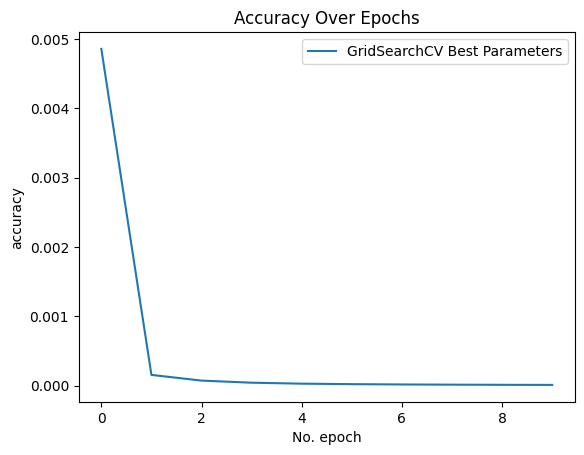

In [112]:
plt.plot(HistoryBest_nn.history['loss'], label='GridSearchCV Best Parameters')
plt.title('Accuracy Over Epochs')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [113]:
cv_scores_nn  = cross_val_score(best_model_nn, X_train, y_train, cv = 5)
print("Cross Validation scores:", cv_scores_nn)
print("mean:", np.mean(cv_scores_nn))

Epoch 1/10
1000/1000 - 3s - 3ms/step - MeanSquaredError: 0.0107 - loss: 0.0107
Epoch 2/10
1000/1000 - 2s - 2ms/step - MeanSquaredError: 5.0101e-04 - loss: 5.0101e-04
Epoch 3/10
1000/1000 - 2s - 2ms/step - MeanSquaredError: 1.1584e-04 - loss: 1.1584e-04
Epoch 4/10
1000/1000 - 2s - 2ms/step - MeanSquaredError: 5.6405e-05 - loss: 5.6405e-05
Epoch 5/10
1000/1000 - 3s - 3ms/step - MeanSquaredError: 3.5370e-05 - loss: 3.5370e-05
Epoch 6/10
1000/1000 - 4s - 4ms/step - MeanSquaredError: 2.5435e-05 - loss: 2.5435e-05
Epoch 7/10
1000/1000 - 5s - 5ms/step - MeanSquaredError: 1.8886e-05 - loss: 1.8886e-05
Epoch 8/10
1000/1000 - 2s - 2ms/step - MeanSquaredError: 8.2604e-06 - loss: 8.2604e-06
Epoch 9/10
1000/1000 - 2s - 2ms/step - MeanSquaredError: 4.0790e-06 - loss: 4.0790e-06
Epoch 10/10
1000/1000 - 3s - 3ms/step - MeanSquaredError: 4.9870e-06 - loss: 4.9870e-06
250/250 - 0s - 1ms/step
Epoch 1/10
1000/1000 - 3s - 3ms/step - MeanSquaredError: 0.0095 - loss: 0.0095
Epoch 2/10
1000/1000 - 3s - 3ms/st

In [115]:
y_pred_nn = best_model_nn.predict(X_test)

print("test_accuracy_score:", mean_squared_error(y_test, y_pred_nn))
print("test set confusion matrix:\n", r2_score(y_test, y_pred_nn))

313/313 - 0s - 1ms/step
test_accuracy_score: 2.1354045366213997e-06
test set confusion matrix:
 0.9991484404008456


## Save neural network model in pickle file

In [127]:
# save model and feature names to  a pickle file

model_data_nn = {"model_nn": best_model_nn, "feature_names_nn": df.columns.values.tolist()}

with open("flood_prediction_neural_network.pk1", "wb") as file:
  pickle.dump(model_data_nn, file)

### Load the saved neural network model from file and use it for prediction

In [128]:
import pickle
import pandas as pd

In [129]:
with open("flood_prediction_neural_network.pk1", "rb") as file:
  model_data_nn = pickle.load(file)

In [130]:
model_nn = model_data_nn["model_nn"]
feature_names_nn =  model_data_nn["feature_names_nn"]

In [131]:
prediction_nn = model_nn.predict(X_test)
print("test_accuracy_score:", mean_squared_error(y_test, prediction_nn))
print("test set confusion matrix:\n", r2_score(y_test, prediction_nn))

313/313 - 0s - 1ms/step
test_accuracy_score: 2.1354045366213997e-06
test set confusion matrix:
 0.9991484404008456


## Comparasion between Neural Network model and Random Forest Regressor model

In [133]:
mean_squared_error(y_test, prediction_nn), mean_squared_error(y_test, prediction_rfr)
# Use of neural network significantly reduced the error

(2.1354045366213997e-06, 0.0006762376695000005)